<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab2_inductance/blob/main/Lab2_Inductance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab2 Inductance

Evgeny Kolonsky Feb - June 2023

Experiment description on [Moodle](https://moodle2223.technion.ac.il/course/view.php?id=4122&section=10#tabs-tree-start)

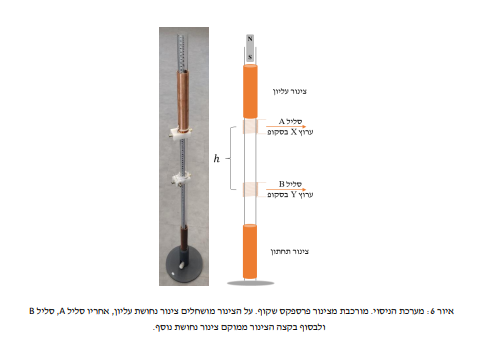

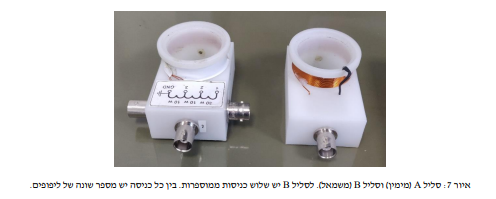

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz as cumtrapz
from scipy.stats import linregress

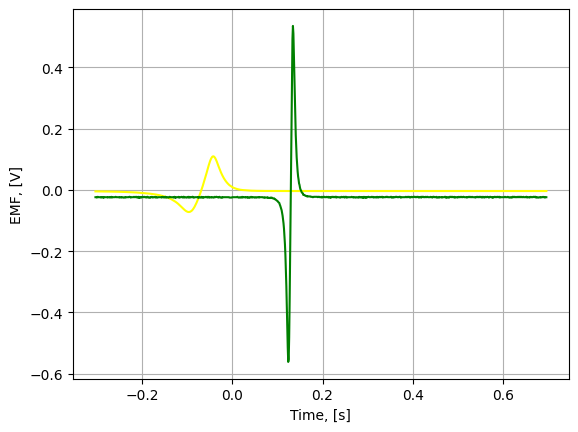

In [36]:
numset = 'I09'
url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_inductance/main/{numset}/'

origin = 11e-2 #m

#%% trace0 - up
n = 50      #loops
location = 36e-2 #m

columns = 'Time (s),1 (VOLT),2 (VOLT)'.split(sep=',')
data  = pd.read_csv(url+'Trace%202.csv', header=1)

time = np.array(data[columns[0]])
Vx = np.array(data[columns[1]])
Vy = np.array(data[columns[2]])

plt.plot(time, Vx, color='yellow')
plt.plot(time, Vy, color='green')
plt.grid()
plt.xlabel('Time, [s]')
plt.ylabel('EMF, [V]')
plt.show();

- Trace 0 : up, N=50, h=36-11
- Trace 1 : down, N=50, h=36-11
- Trace 2 : up, N=20, h=36-11
- Trace 3 : down, N=20, h=36-11
- Trace 4 : up, N=10, h=36-11
- Trace 5 : down, N=10, h=36-11
- Trace 6 : up, N=50, h=20-11
- Trace 7 : up, N=50, h=24-11
- Trace 8 : up, N=50, h=28-11
- Trace 9 : up, N=50, h=32-11
- Trace 10: up, N=50, h=36-11
- Trace 11: up, N=50, h=40-11
- Trace 12: up, N=50, h=44-11
- Trace 13: up, N=50, h=48-11
- Trace 14: up, N=50, h=52-11
- Trace 15: up, N=50, h=56-11
- Trace 16: up, N=50, h=60-11

In [37]:
def load_data(num):

    fname = 'Trace%20{:d}.csv'.format(num)
    data  = pd.read_csv(url+fname, header=1)
    time = np.array(data[columns[0]])
    Vx = np.array(data[columns[1]])
    Vy = np.array(data[columns[2]])
    return time, Vx, Vy

# EMF for changing N

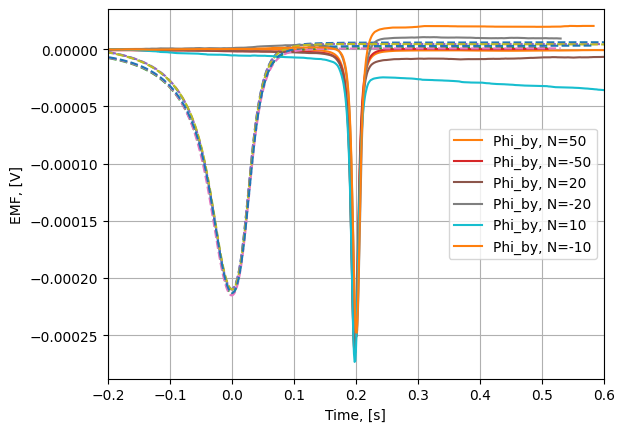

In [38]:
windings_y = np.array([50,  -50, 20, -20, 10, -10])
windings_x = np.array([20,  -20, 20, -20, 20, -20])
t_fall = np.array([]) # for each experiment a time of fall from slil A to slil B
for i in range(6):
    time, Vx, Vy = load_data(i)
    Vx -= np.mean(Vx[-10:-1]) #get rid of offset
    Vy -= np.mean(Vy[:10])    #get rid of offset
    
    #correct time
    phi_bx = cumtrapz(Vx, time, initial=0)
    phi_by = cumtrapz(Vy, time, initial=0)
    time -= time[np.argmax(np.abs(phi_bx))] # set time =0 when magnet passes slil A (Channel X)   
    t_fall = np.append(t_fall, time[np.argmax(np.abs(phi_by))])
    
    # plt.plot(time, Vx)
    # plt.plot(time, Vy, label='Vy, n={:d}'.format(i))
    plt.plot(time, phi_bx/windings_x[i], '--')
    plt.plot(time, phi_by/windings_y[i], label='Phi_by, N={:d}'.format(windings_y[i]))


plt.grid()
plt.xlabel('Time, [s]')
plt.ylabel('EMF, [V]')
plt.legend(loc='center right')
plt.xlim(-0.2, 0.6)
plt.show()

# EMF for changing h

(-0.2, 0.6)

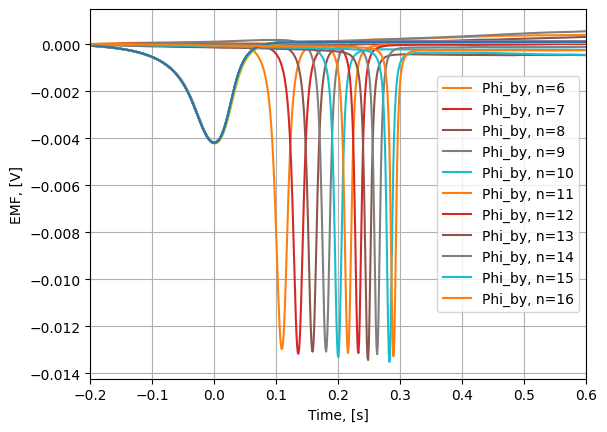

In [39]:
h_fall = np.arange(20, 61, 4)*1e-2 - origin #m
t_fall = np.array([])
for i in range(6, 17):
    time, Vx, Vy = load_data(i)
    Vx -= np.mean(Vx[-10:-1]) #get rid of offset
    Vy -= np.mean(Vy[:10])    #get rid of offset
    
    #correct time
    phi_bx = cumtrapz(Vx, time, initial=0)
    phi_by = cumtrapz(Vy, time, initial=0)
    time -= time[np.argmax(np.abs(phi_bx))] # set time =0 when magnet passes slil A (Channel X)   
    t_fall = np.append(t_fall, time[np.argmax(np.abs(phi_by))])
    # plt.plot(time, Vx)
    # plt.plot(time, Vy, label='Vy, n={:d}'.format(i))
    plt.plot(time, phi_bx)
    plt.plot(time, phi_by, label='Phi_by, n={:d}'.format(i))


plt.grid()
plt.xlabel('Time, [s]')
plt.ylabel('EMF, [V]')
plt.legend(loc='center right')
plt.xlim(-0.2, 0.6)


# Linear approximation

$$ {h \over t} = v_T + {g \over 2} t$$

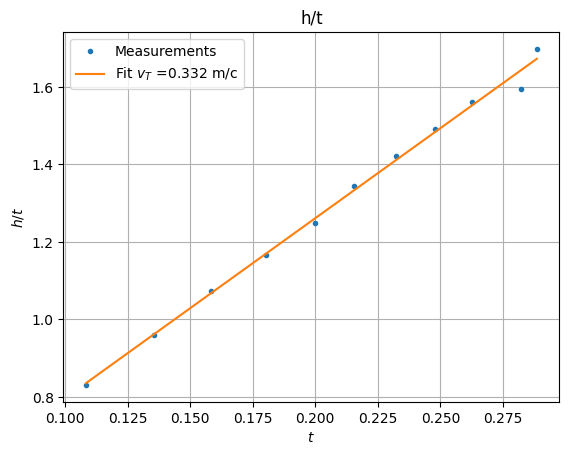

In [40]:
plt.plot(t_fall, h_fall/t_fall, '.', label='Measurements')

fit = linregress(t_fall, h_fall/t_fall)
v_t = fit.intercept
acc = fit.slope*2

plt.plot(t_fall, fit.slope*t_fall + fit.intercept, label=rf'Fit $v_T$ ={v_t:.3f} m/c')
plt.xlabel(r'$t$')
plt.ylabel(r'$h/t$')
plt.grid()
plt.legend()
plt.title('h/t')

plt.show();

Text(0, 0.5, '$\\Phi_2$, [T]')

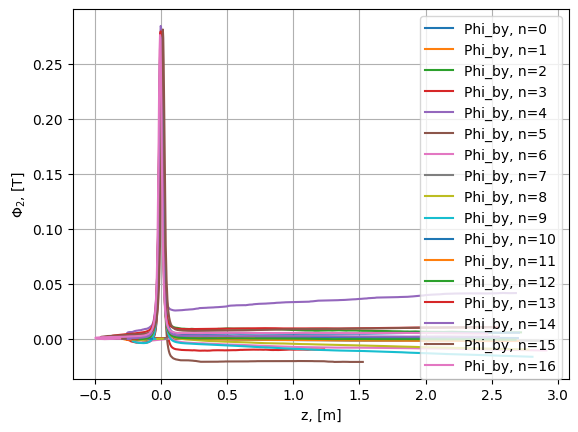

In [41]:
#%%
D = 35e-3 #m, diameter slil A, B
a = np.pi*D*D/4
locations = np.array([.36-.11]*6 + list(h_fall))
windings = np.array([50,  -50, 20, -20, 10, -10] +[50]*len(t_fall))
for i in range(17):
    
    time, Vx, Vy = load_data(i)
    Vx -= np.mean(Vx[-10:-1]) #get rid of offset
    Vy -= np.mean(Vy[:10])    #get rid of offset
    
    #correct time
    phi_bx = cumtrapz(Vx, time, initial=0)
    phi_by = cumtrapz(Vy, time, initial=0)
    time -= time[np.argmax(np.abs(phi_bx))] # set time =0 when magnet passes slil A (Channel X)   
    
    # plt.plot(time, Vx)
    # plt.plot(time, Vy, label='Vy, n={:d}'.format(i))
    z = v_t *time + acc*time**2/2
    # plt.plot(z, phi_bx/20)
    plt.plot(z-locations[i], -phi_by/windings[i]/a, label='Phi_by, n={:d}'.format(i))

plt.grid()
plt.legend()
plt.xlabel('z, [m]')
plt.ylabel(r'$\Phi_2$, [T]')



(-0.01, 0.2)

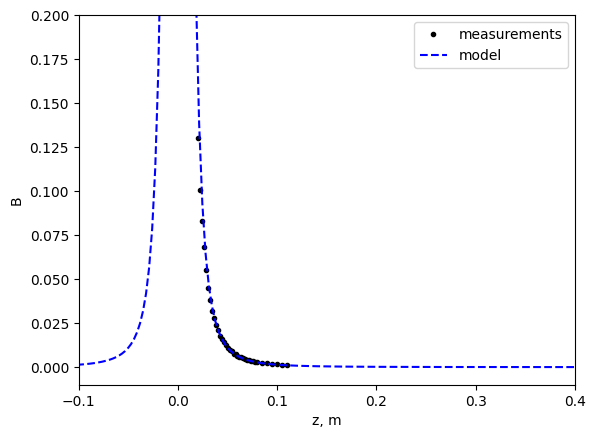

In [42]:
xs = np.array([4,   4.2,   4.4,  4.6,  4.8,  5,    5.2,  5.4,  5.6,  5.8, 6, 6.2, 6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6, 9.8, 10, 10.5, 11, 11.5, 12, 12.5, 13])*1e-2 #m
Bs = np.array([130, 100.8, 83.1, 68.1, 55.3, 45.1, 38.4, 31.8, 27.8, 23.8, 21.0, 17.8, 15.9, 14.0, 12.5, 11.1, 9.96, 8.93, 7.71, 7.30, 6.57, 6.03, 5.50, 5.01, 4.64, 4.26, 3.95, 3.65, 3.41, 3.13, 2.93, 2.46, 2.11, 1.82, 1.60, 1.40,1.25  ])*1e-3 #T

xs -= 0.02 # correct origin to middle of magnet.
plt.plot(xs, Bs, 'k.',label='measurements')
plt.xlim(-0.1, .4)
plt.legend(loc='center right')
#%% calculating M
h= 2e-2 # m
b = 1e-2 #m

dist_dependence = (xs + h/2)/np.sqrt((xs + h/2)**2 + b**2) - (xs - h/2)/np.sqrt((xs - h/2)**2 + b**2)

inds = Bs<0.0075
reg2 = linregress(dist_dependence[inds], Bs[inds])
# print(reg)
M_reg2 = reg2.slope
R_reg2 = reg2.rvalue


# plt.figure()
# plt.plot(dist_dependence, Bs, '.', label = 'measurements')
# plt.plot(dist_dependence, dist_dependence*reg.slope + reg.intercept, '-', label = 'reg full')
# plt.plot(dist_dependence[inds], dist_dependence[inds]*reg2.slope + reg2.intercept, '-', label = 'reg B<0.0075T')
# plt.grid()
# plt.xlabel('distance [m]')
# plt.ylabel('B [T]')
# plt.ylim([0,0.0075])
# plt.xlim([0,0.011])
# plt.legend()
#%%

dist_dependence_z = (z-locations[i] + h/2)/np.sqrt((z-locations[i] + h/2)**2 + b**2) - (z-locations[i] - h/2)/np.sqrt((z-locations[i] - h/2)**2 + b**2)
plt.plot(z-locations[i],dist_dependence_z*M_reg2, 'b--', label='model' )

plt.legend()
plt.xlabel('z, m')
plt.ylabel('B')
plt.ylim(-0.01, .2)